In [14]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = gdal.Open('data/planet/composite.tif')
r = img.GetRasterBand(1).ReadAsArray()
g = img.GetRasterBand(2).ReadAsArray()
b = img.GetRasterBand(3).ReadAsArray()
nir = img.GetRasterBand(4).ReadAsArray()

In [4]:
img.GetProjection()

'PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'

In [5]:
img.GetGeoTransform() #upper left corner

(579030.0, 3.0, 0.0, 5190897.0, 0.0, -3.0)

In [6]:
img.RasterYSize

1071

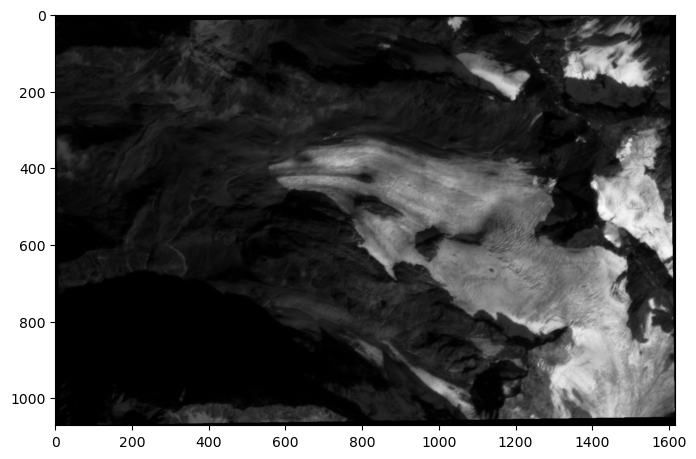

In [9]:
f, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(r, cmap='Greys_r')
plt.show()

In [28]:
def get_extent(img):
    return (img.GetGeoTransform()[0],
            img.GetGeoTransform()[0]+img.GetGeoTransform()[1]*img.RasterXSize,
            img.GetGeoTransform()[3]+img.GetGeoTransform()[5]*img.RasterYSize,
            img.GetGeoTransform()[3],) # left, right, bottom, top

In [30]:
img_extent

(579030.0, 583881.0, 5187684.0, 5190897.0)

In [31]:
img_extent = get_extent(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


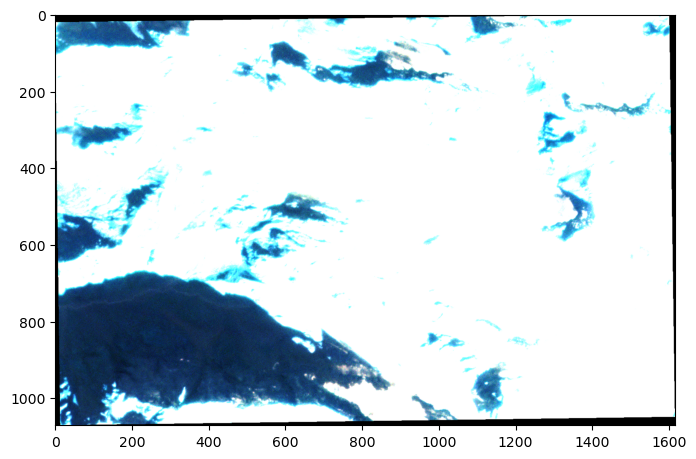

In [32]:
rgb = np.dstack((r,g,b)) # depth-wise stacking
f, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(rgb)
plt.show()

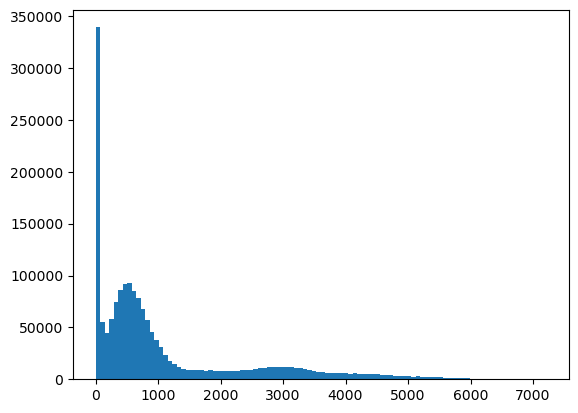

In [33]:
# inspect histogram
plt.hist(r.flatten(), bins=100)
plt.show()

In [34]:
def ScaleMinMax(x):
    return (x-np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))

In [35]:
def ScaleCCC(x):
    return ((x-np.nanpercentile(x, 2))/(np.nanpercentile(x, 98)-np.nanpercentile(x,2)))

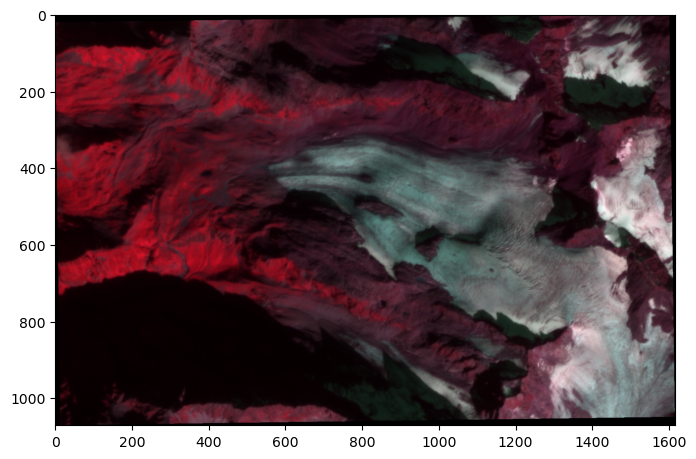

In [39]:
rgb = np.dstack((ScaleMinMax(nir),ScaleMinMax(r),ScaleMinMax(g))) # depth-wise stacking
f, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(rgb)
plt.show()